In [1]:
# For training
from keras.applications import VGG16
from keras import models, optimizers, layers
# Testing plugin
from livelossplot import PlotLossesKeras
# For image loading
from skimage import io
import numpy as np
from tqdm import tqdm_notebook

/home/sagacius/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
height = 350
width = 350

In [3]:
vgg_conv = VGG16(weights="imagenet", include_top=False, input_shape=(height, width, 3))
#vgg_conv.summary()

In [4]:
# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_conv.layers])

# Getting output tensor of the last VGG layer that we want to include
x = layer_dict['block2_pool'].output

# Stacking a new simple convolutional network on top of it    
x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4, activation='softmax')(x)

# Creating new model. Please note that this is NOT a Sequential() model.
from keras.models import Model
model = Model(input=vgg_conv.input, output=x)

# Make sure that the pre-trained bottom layers are not trainable
for layer in model.layers[:7]:
    layer.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 350, 350, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 350, 350, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 350, 350, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 175, 175, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 175, 175, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 175, 175, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 87, 87, 128)       0         
__________

/home/sagacius/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [5]:
x_train = np.load("Cache/LPD/new/x_train.npy")
y_train = np.load("Cache/LPD/new/y_train.npy")
x_test = np.load("Cache/LPD/new/x_test.npy")
y_test = np.load("Cache/LPD/new/y_test.npy")
x_validation = np.load("Cache/LPD/new/x_validation.npy")
y_validation = np.load("Cache/LPD/new/y_validation.npy")

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [7]:
im_train = []
im_validation = []
for path in tqdm_notebook(x_train):
    im = io.imread(path.split("../")[1])
    im_train.append(im)
for path in tqdm_notebook(x_validation):
    im = io.imread(path.split("../")[1])
    im_validation.append(im)

In [8]:
im_train = np.asarray(im_train, dtype="float64") / 255.
im_validation = np.asarray(im_validation, dtype="float64") / 255.
print("[INFO] train matrix: {:.2f}MB".format(im_train.nbytes / (1024 * 1000.0)))
print("[INFO] validation matrix: {:.2f}MB".format(im_validation.nbytes / (1024 * 1000.0)))

[INFO] train matrix: 1808.79MB
[INFO] validation matrix: 258.40MB


In [10]:
model.compile(loss='mse',
              optimizer=optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

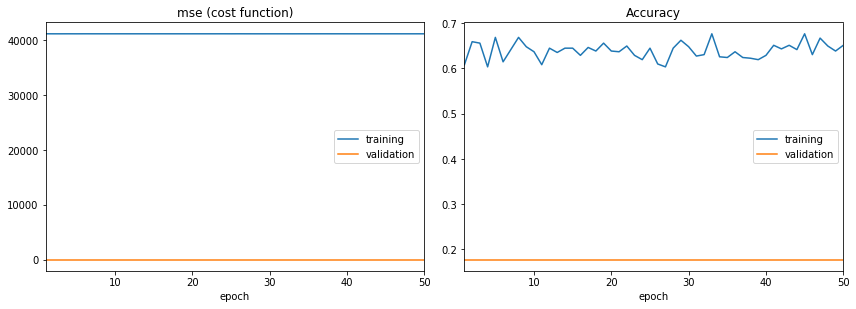

In [12]:
history = model.fit(
    im_train,
    y_train,
    batch_size=20,
    epochs=50,
    validation_data=(im_validation, y_validation),
    shuffle=True,
    callbacks=[PlotLossesKeras()],
    verbose=1
)

In [13]:
model.save('Models/LD_mark1.h5')

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [15]:
import numpy as np
nacc = np.asarray(acc)
nval_acc = np.asarray(val_acc)
nloss = np.asarray(loss)
nval_loss = np.asarray(val_loss)
logs_mark = np.row_stack((nacc, nval_acc, nloss, nval_loss))

In [16]:
np.save("Logs/LD_mark1.npy", logs_mark)

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

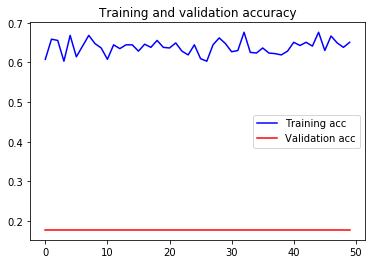

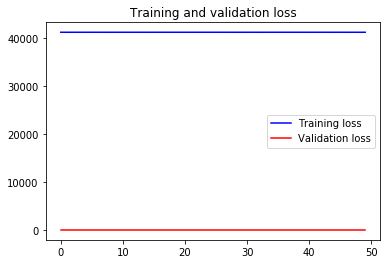

In [18]:
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [22]:
im_test = []
for path in tqdm_notebook(x_test):
    im = io.imread(path.split("../")[1])
    im = np.reshape(im, (1, height, width, 3))
    im_test.append(im)

In [23]:
predictions = []
for im in tqdm_notebook(im_test):
    prediction = model.predict(im_test[0])
    predictions.append(append)

In [24]:
idx = 100
for p in predictions:
    print(p)

[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.14976957]]
[[0.11350844 0.40920097 0.1318328  0.149